In [1]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Windows용 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

In [3]:
df = pd.read_excel("./1-9호선 통합본(중복 제거).xlsx")

In [7]:
df.head()

,Unnamed: 0,역명,노선명,mean,max,min,노선개수,대합실면적,승강장면적,지하상가 개수,역내편의점 개수,화장실개수,에스컬레이터 대수,엘리베이터 대수,자전거보관소 대수,물품보관함 개수,소화기 대수,스마트도서관 개수
0,0,동대문,1호선,23812,35181,16032,2,3400.0,2090.0,1.0,0,1.0,1.0,1.0,30,25.0,47,0
1,1,동묘앞,1호선,21015,37417,12384,2,5700.0,4194.0,1.0,0,4.0,12.0,12.0,6,9.0,43,0
2,2,서울역,1호선,105211,139845,65919,2,8725.0,2080.0,1.0,0,1.0,5.0,5.0,10,64.0,NaN,0
3,3,시청,1호선,49914,74556,17937,2,6863.0,3784.0,6.0,0,1.0,3.0,3.0,25,44.0,68,1
4,4,신설동,1호선,26842,37009,9983,2,4164.0,3076.0,NaN,0,1.0,NaN,NaN,66,9.0,46,0


In [9]:
df.tail()

,Unnamed: 0,역명,노선명,mean,max,min,노선개수,대합실면적,승강장면적,지하상가 개수,역내편의점 개수,화장실개수,에스컬레이터 대수,엘리베이터 대수,자전거보관소 대수,물품보관함 개수,소화기 대수,스마트도서관 개수
308,308,종합운동장,9호선,9845,15620,2730,2,NaN,NaN,2.0,1,2.0,18.0,6.0,20,NaN,35,0
309,309,중앙보훈병원,9호선,20851,29135,5508,1,NaN,NaN,1.0,1,1.0,10.0,5.0,210,9.0,-,1
310,310,증미,9호선,14372,20485,3537,1,NaN,NaN,NaN,1,1.0,18.0,3.0,30,NaN,66,0
311,311,한성백제,9호선,5735,14163,1628,1,NaN,NaN,NaN,1,1.0,10.0,3.0,200,9.0,-,0
312,312,흑석,9호선,18235,29833,5437,1,NaN,NaN,NaN,1,1.0,16.0,4.0,40,NaN,56,0


In [11]:
# 평방미터당 이용객수
df['평방미터당 이용객수'] = (df['mean']/(df['대합실면적']+df["승강장면적"]))

In [13]:
# 이동 편의시설 개수
df['이동 편의시설 개수'] = df['에스컬레이터 대수'] + df['엘리베이터 대수']

In [15]:
# 9호선은 면적정보 없으므로 9호선에 해당하는 행은 제거

In [17]:
df

,Unnamed: 0,역명,노선명,mean,max,min,노선개수,대합실면적,승강장면적,지하상가 개수,역내편의점 개수,화장실개수,에스컬레이터 대수,엘리베이터 대수,자전거보관소 대수,물품보관함 개수,소화기 대수,스마트도서관 개수,평방미터당 이용객수,이동 편의시설 개수
0,0,동대문,1호선,23812,35181,16032,2,3400.0,2090.0,1.0,0,1.0,1.0,1.0,30,25.0,47,0,4.337341,2.0
1,1,동묘앞,1호선,21015,37417,12384,2,5700.0,4194.0,1.0,0,4.0,12.0,12.0,6,9.0,43,0,2.124015,24.0
2,2,서울역,1호선,105211,139845,65919,2,8725.0,2080.0,1.0,0,1.0,5.0,5.0,10,64.0,NaN,0,9.737251,10.0
3,3,시청,1호선,49914,74556,17937,2,6863.0,3784.0,6.0,0,1.0,3.0,3.0,25,44.0,68,1,4.688081,6.0
4,4,신설동,1호선,26842,37009,9983,2,4164.0,3076.0,NaN,0,1.0,NaN,NaN,66,9.0,46,0,3.707459,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,308,종합운동장,9호선,9845,15620,2730,2,NaN,NaN,2.0,1,2.0,18.0,6.0,20,NaN,35,0,NaN,24.0
309,309,중앙보훈병원,9호선,20851,29135,5508,1,NaN,NaN,1.0,1,1.0,10.0,5.0,210,9.0,-,1,NaN,15.0
310,310,증미,9호선,14372,20485,3537,1,NaN,NaN,NaN,1,1.0,18.0,3.0,30,NaN,66,0,NaN,21.0
311,311,한성백제,9호선,5735,14163,1628,1,NaN,NaN,NaN,1,1.0,10.0,3.0,200,9.0,-,0,NaN,13.0


In [75]:
# result_data = df.set_index('평방미터당이용객수')[['에스컬레이터 대수']]

In [77]:
# result_data

In [79]:
# 스타일 테마 설정(스타일 테마 설정 이후에 한글 폰트 설정이 리셋됨)
# sns.set_style("darkgrid")

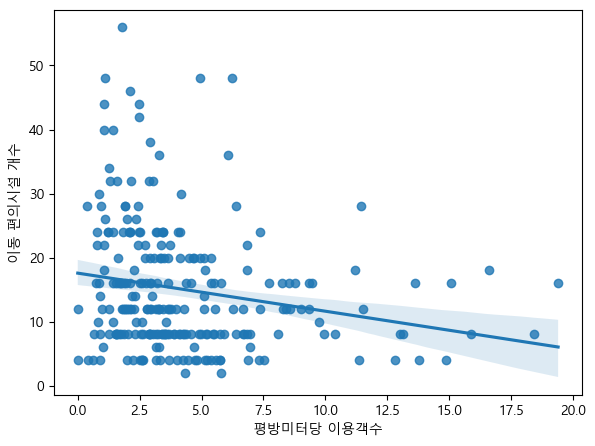

In [21]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)

# 선형회귀선 표시
sns.regplot(x = "평방미터당 이용객수", # x축 변수
            y = "이동 편의시설 개수", # y축 변수
            data = df, # 데이터
            ax = ax1) # axe 객체 - 1번째 그래프

plt.savefig("./esc_per_users.png", transparent = True)

plt.show()

- 회귀선이 우하향하고 있음
- 역의 이용객이 많으면 이동 편의시설도 많아야한다는 직관과 반대되는 결과가 나왔음
- 평방미터당 이용객수가 많으면 이용객 밀도가 높다는 뜻인데 이때 역사 면적이 작을수록 그 값이 크게 나타날 수 있음
- 환승역(노선개수가 2개이상인 역)과 비환승역(노선개수가 한개)의 개념에서 생각해보기
   -> 환승역이 일반적으로 역사면적이 넓기 때문에 평방미터당 이용객수(이용객 밀도)가 낮을 수 있음
   -> 환승역에는 보통 이동편의시설 개수가 많음
- 실제로 데이터를 통해 확인해본 결과 노선개수가 많은 역의 평균 면적이 더 넓었음!!
- t-test 검정으로 환승역과 비환승역의 면적 차이가 유의미함을 알 수 있었음

In [19]:
df["면적"] = df['대합실면적']+df["승강장면적"]

In [51]:
df.groupby("노선개수")[["면적","평방미터당 이용객수","이동 편의시설 개수"]].mean()

,면적,평방미터당 이용객수,이동 편의시설 개수
노선개수,,,
1,7467.150754,4.456971,14.543478
2,9441.522388,3.593880,15.932203
3,10839.500000,3.433024,19.500000


## 환승역과 비환승역의 면적과 이동편의시설 개수 차이가 유의미한지 통계적 검정

In [101]:
df1 = df.loc[df["노선개수"]==1, ["노선개수", "면적", "이동 편의시설 개수"]]

In [107]:
df1.isnull().sum()

노선개수           0
면적             1
이동 편의시설 개수    16
dtype: int64

In [119]:
df1 = df1.dropna()

In [111]:
df2 = df.loc[df["노선개수"]>=2, ["노선개수", "면적", "이동 편의시설 개수"]]

In [113]:
df2.isnull().sum()

노선개수          0
면적            0
이동 편의시설 개수    8
dtype: int64

In [117]:
df2 = df2.dropna()

In [140]:
group1 = df1["면적"]
group2 = df2["면적"]

In [130]:
# 독립표본 t검정 수행
stats.ttest_ind(group1, group2, equal_var = True)

TtestResult(statistic=-5.6676119573940005, pvalue=4.008878530234579e-08, df=248.0)

- pvalue가 0.05보다 작으므로 group1(비환승역)과 group2(환승역)의 면적은 통계적으로 유의미한 차이가 있음

## 평방미터당 이용객수(이용자수 밀집도) 가 낮은순서로

In [29]:
df.sort_values(by = "평방미터당 이용객수", ascending = True)

,Unnamed: 0,역명,노선명,mean,max,min,노선개수,대합실면적,승강장면적,지하상가 개수,...,화장실개수,에스컬레이터 대수,엘리베이터 대수,자전거보관소 대수,물품보관함 개수,소화기 대수,스마트도서관 개수,면적,평방미터당 이용객수,이동 편의시설 개수
202,202,연신내,6호선,3,19,1,2,3241.0,2419.0,1.0,...,1.0,6.0,6.0,0,NaN,25,0,5660.0,0.000530,12.0
197,197,신내,6호선,1,3,1,1,106.0,752.0,NaN,...,NaN,2.0,2.0,0,NaN,12,0,858.0,0.001166,4.0
91,91,충무로,3호선,9,40,1,2,0.0,3860.0,NaN,...,NaN,NaN,NaN,0,NaN,17,0,3860.0,0.002332,NaN
100,100,동작,4호선,3197,18559,1195,2,5144.0,5392.0,2.0,...,1.0,NaN,NaN,70,15.0,66,0,10536.0,0.303436,NaN
158,158,영등포구청,5호선,8542,11669,1859,2,20239.0,2813.0,2.0,...,1.0,14.0,14.0,40,9.0,47,0,23052.0,0.370554,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,308,종합운동장,9호선,9845,15620,2730,2,NaN,NaN,2.0,...,2.0,18.0,6.0,20,NaN,35,0,NaN,NaN,24.0
309,309,중앙보훈병원,9호선,20851,29135,5508,1,NaN,NaN,1.0,...,1.0,10.0,5.0,210,9.0,-,1,NaN,NaN,15.0
310,310,증미,9호선,14372,20485,3537,1,NaN,NaN,NaN,...,1.0,18.0,3.0,30,NaN,66,0,NaN,NaN,21.0
311,311,한성백제,9호선,5735,14163,1628,1,NaN,NaN,NaN,...,1.0,10.0,3.0,200,9.0,-,0,NaN,NaN,13.0


In [21]:
df.sort_values(by="평방미터당 이용객수", ascending = True)

,Unnamed: 0,역명,노선명,mean,max,min,노선개수,대합실면적,승강장면적,지하상가 개수,...,화장실개수,에스컬레이터 대수,엘리베이터 대수,자전거보관소 대수,물품보관함 개수,소화기 대수,스마트도서관 개수,평방미터당 이용객수,이동 편의시설 개수,면적
202,202,연신내,6호선,3,19,1,2,3241.0,2419.0,1.0,...,1.0,6.0,6.0,0,NaN,25,0,0.000530,12.0,5660.0
197,197,신내,6호선,1,3,1,1,106.0,752.0,NaN,...,NaN,2.0,2.0,0,NaN,12,0,0.001166,4.0,858.0
91,91,충무로,3호선,9,40,1,2,0.0,3860.0,NaN,...,NaN,NaN,NaN,0,NaN,17,0,0.002332,NaN,3860.0
100,100,동작,4호선,3197,18559,1195,2,5144.0,5392.0,2.0,...,1.0,NaN,NaN,70,15.0,66,0,0.303436,NaN,10536.0
158,158,영등포구청,5호선,8542,11669,1859,2,20239.0,2813.0,2.0,...,1.0,14.0,14.0,40,9.0,47,0,0.370554,28.0,23052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,308,종합운동장,9호선,9845,15620,2730,2,NaN,NaN,2.0,...,2.0,18.0,6.0,20,NaN,35,0,NaN,24.0,NaN
309,309,중앙보훈병원,9호선,20851,29135,5508,1,NaN,NaN,1.0,...,1.0,10.0,5.0,210,9.0,-,1,NaN,15.0,NaN
310,310,증미,9호선,14372,20485,3537,1,NaN,NaN,NaN,...,1.0,18.0,3.0,30,NaN,66,0,NaN,21.0,NaN
311,311,한성백제,9호선,5735,14163,1628,1,NaN,NaN,NaN,...,1.0,10.0,3.0,200,9.0,-,0,NaN,13.0,NaN
